# 1. Import Data

In [1]:
!pip install pandas scikit-learn xgboost dill

In [2]:
pip install pandas 

You should consider upgrading via the '/Users/yeshwanthvemula/Desktop/Full Stack Machine Learning/fullstack/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
# Load in data 
df = pd.read_csv('regressiondata.csv', index_col='ID')

In [5]:
# Displays the first five rows of data
df.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,2021.02,14.0,378.827222,5.0,5614.0,439963


In [6]:
# Show last five rows of data
df.tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9351,2019.07,36.0,554.324820,3.0,5217.0,420246
9352,2021.02,21.0,2296.349397,4.0,5614.0,256087
9353,2020.11,18.0,856.174897,0.0,5614.0,257663
9354,2021.10,6.0,87.260667,9.0,5614.0,681072
9355,2020.12,20.0,584.007146,4.0,5614.0,403096


In [7]:
# Get a specific row
df.iloc[9351]

TransactionDate        2019.07
HouseAge                  36.0
DistanceToStation    554.32482
NumberOfPubs               3.0
PostCode                5217.0
HousePrice              420246
Name: 9351, dtype: object

# 2. Split Data to Prevent Snooping Bias

In [8]:
pip install -U scikit-learn scipy matplotlib

You should consider upgrading via the '/Users/yeshwanthvemula/Desktop/Full Stack Machine Learning/fullstack/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Import splitting function
from sklearn.model_selection import train_test_split

In [10]:
# Split data into training and testing 
train, test = train_test_split(df, test_size=0.3, random_state=1234)

In [11]:
# See the train parition
train.head() 

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286
5758,2020.01,17.0,614.851833,3.0,5213.0,253332
4030,2021.06,34.0,285.892687,9.0,5614.0,486532
8447,2020.12,0.0,195.213314,6.0,5222.0,595168
4370,2019.03,34.0,124.082230,8.0,5212.0,250495


# 3. Exploratory Data Analysis

## Bird's Eye View

In [12]:
train.iloc[0]['HousePrice']

'460286'

In [13]:
train.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [14]:
# Get Information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6549 entries, 8450 to 8915
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    6548 non-null   float64
 1   HouseAge           6546 non-null   float64
 2   DistanceToStation  6547 non-null   float64
 3   NumberOfPubs       6547 non-null   float64
 4   PostCode           6547 non-null   float64
 5   HousePrice         6544 non-null   object 
dtypes: float64(5), object(1)
memory usage: 358.1+ KB


In [15]:
# Create summary statistics
train.describe()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,6548.000000,6546.000000,6547.000000,6.547000e+03,6547.000000
mean,2020.072389,17.375344,1091.759504,7.677828e+02,5294.499160
std,0.815922,11.469272,1270.038426,6.179430e+04,158.397718
min,2019.010000,0.000000,23.829424,0.000000e+00,5212.000000
25%,2019.100000,9.000000,268.649033,1.000000e+00,5213.000000
50%,2020.070000,15.000000,545.312168,4.000000e+00,5217.000000
75%,2021.040000,28.000000,1529.343484,6.000000e+00,5222.000000
max,2021.120000,43.000000,6486.256457,4.999999e+06,5614.000000


In [16]:
# Type cast incorrect datatypes to new datatypes
train['PostCode'] = train['PostCode'].astype(str)
train['TransactionDate'] = train['TransactionDate'].astype(str)
#train['HousePrice'] = train['HousePrice'].astype(float) 

In [17]:
# Create summary statistics for non-numeric features
train.describe(include='object')

,TransactionDate,PostCode,HousePrice
count,6549,6549,6544
unique,37,6,6496
top,2019.01,5212.0,620558
freq,212,1338,2


## Analyse Numerical Attributes

### Plot Distributions

In [18]:
# Install dependencies 
!pip install matplotlib seaborn

In [19]:
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /Users/yeshwanthvemula/anaconda3/lib/python3.11/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [20]:
%pip install seaborn

You should consider upgrading via the '/Users/yeshwanthvemula/Desktop/Full Stack Machine Learning/fullstack/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Import data viz libs 
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
# Show shape of data
train.shape

(6549, 6)

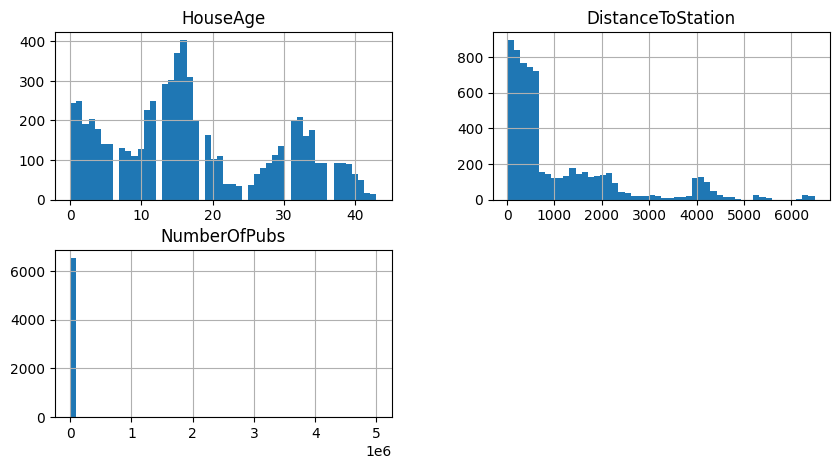

In [23]:
# Plot distributions
train.hist(figsize=(10,5), bins=50)
plt.show()

### Why isn't House Price Showing up as Numeric?

In [24]:
# str => float 
train['HousePrice'].astype(float)

ValueError: could not convert string to float: '??'

In [25]:
# Filter dataset based on HousePrice == '??'
train[train['HousePrice'] == '??']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8718,2020.08,16.0,122.432508,5.0,5213.0,??


In [26]:
# Drop rows that equal '??'
train = train[train['HousePrice'] !='??']

In [27]:
# Double check if the row has been dropped
train[train['HousePrice'] == '??']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [28]:
# Overwrite the house price column with the converted column
train['HousePrice'] = train['HousePrice'].astype(float)

In [29]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

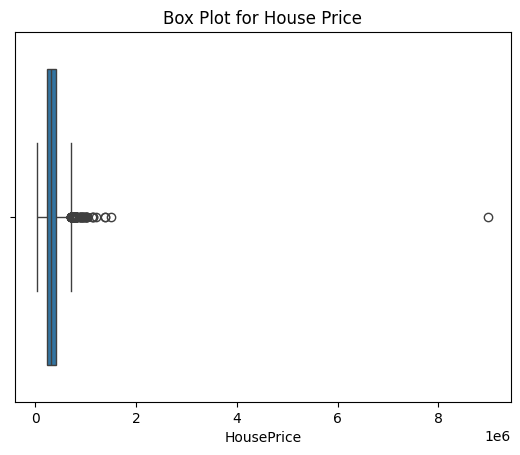

In [30]:
# Create a box plot for house prices
plt.title('Box Plot for House Price')
sns.boxplot(x=train['HousePrice'])
plt.show()

### Drop Outlier 

In [31]:
# Find the outlier
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8445,2021.05,0.0,276.789752,9.0,5222.0,8989772.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [32]:
train = train.drop(8445)

In [33]:
# Find the outlier
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
5091,2020.05,10.0,295.072723,1.0,5614.0,1151940.0
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


### What's happening with pubs

In [34]:
train.sort_values('NumberOfPubs').tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
4774,2021.12,33.0,274.162868,10.0,5222.0,607856.0
310,2019.1,30.0,121.517103,10.0,5614.0,421505.0
13,2019.05,8.0,273.264542,4999999.0,5213.0,356012.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [35]:
train.drop(13, inplace=True)

In [36]:
train.sort_values('NumberOfPubs').tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
3222,2019.02,7.0,452.968740,10.0,5213.0,334048.0
4251,2021.11,31.0,164.006952,10.0,5212.0,246487.0
712,2019.12,8.0,545.828342,10.0,5614.0,411871.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,2019.08,20.0,370.088151,NaN,nan,NaN


## Analyse Categorical Variables

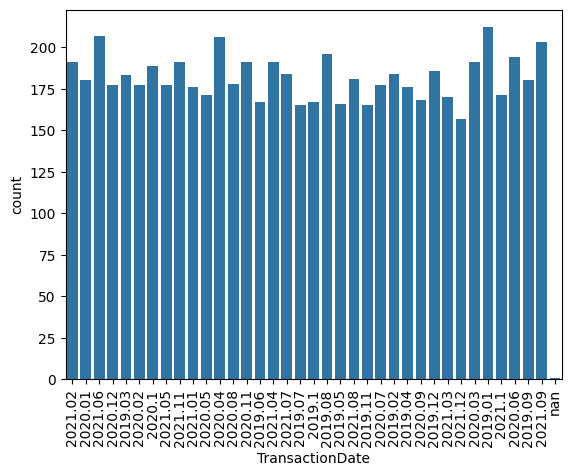

In [37]:
# Create a countplot for transaction date
plt.xticks(rotation=90)
sns.countplot(x='TransactionDate', data=train)
plt.show()

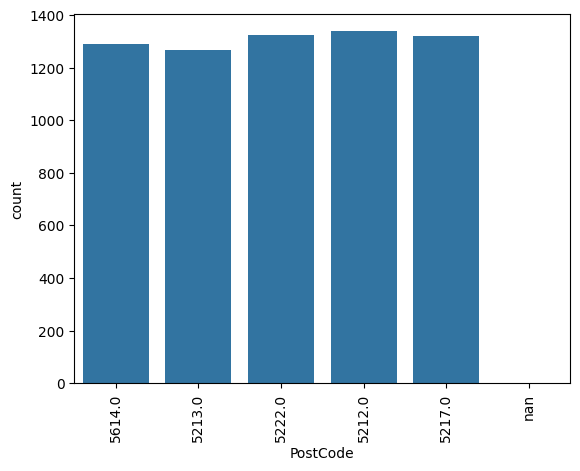

In [38]:
# Create a countplot for transaction date
plt.xticks(rotation=90)
sns.countplot(x=train['PostCode'])
plt.show()

## Analyse Relationships Numeric/Numeric

### Calculate Pearson's Correlation

In [39]:
# Calculate pearsons correlation
train.select_dtypes(exclude='object').corr()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice
HouseAge,1.000000,0.034074,0.044189,-0.156693
DistanceToStation,0.034074,1.000000,-0.586704,-0.539859
NumberOfPubs,0.044189,-0.586704,1.000000,0.452309
HousePrice,-0.156693,-0.539859,0.452309,1.000000


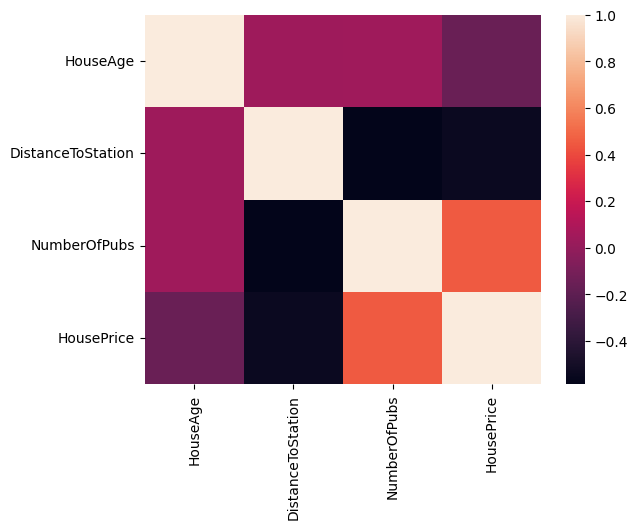

In [40]:
# Viz correlation using a heatmap
sns.heatmap(train.select_dtypes(exclude='object').corr()) 
plt.show()

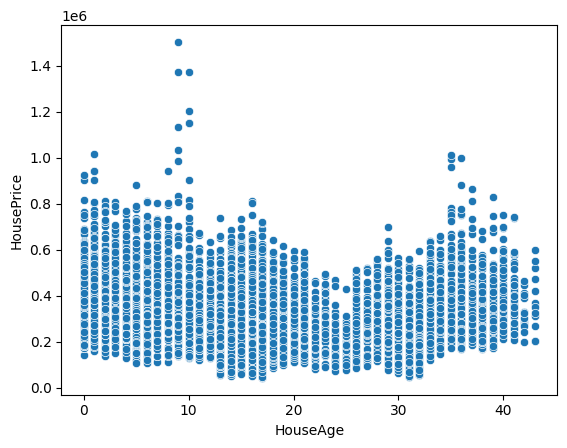

In [41]:
# Created a scatter plot
sns.scatterplot(x='HouseAge', y='HousePrice', data=train)
plt.show()

## Analyse Relationships Cat/Num

### Is Post Code Driving Value?

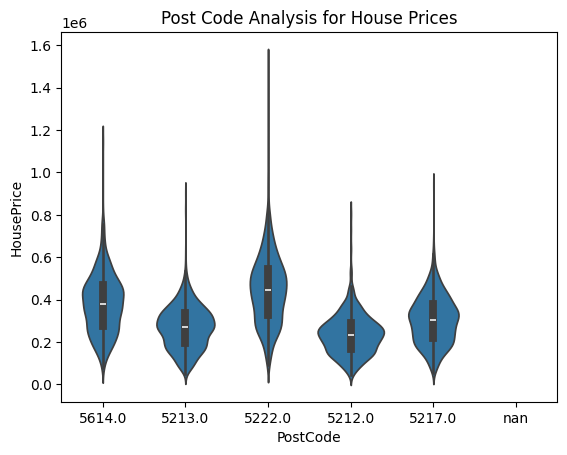

In [42]:
plt.title('Post Code Analysis for House Prices')
sns.violinplot(x='PostCode', y='HousePrice', data=train)
plt.show()

### What about the date it was sold?

In [43]:
# Check for nulls in a column
train[train['TransactionDate'].isnull()]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [44]:
# Check if a string exists in a column
train[train['TransactionDate']=='nan']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
7673,nan,NaN,3830.892098,0.0,5217.0,NaN


In [45]:
# Drop missing house prices
train = train[~train['HousePrice'].isnull()]

In [46]:
int(train.iloc[0]['TransactionDate'][5:])

2

In [47]:
# Apply string transformation on Transaction Date
train['YearSold'] = train['TransactionDate'].apply(lambda x: x[:4]).astype(int)
train['MonthSold'] = train['TransactionDate'].apply(lambda x: x[5:]).astype(int)

In [48]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
YearSold               int64
MonthSold              int64
dtype: object

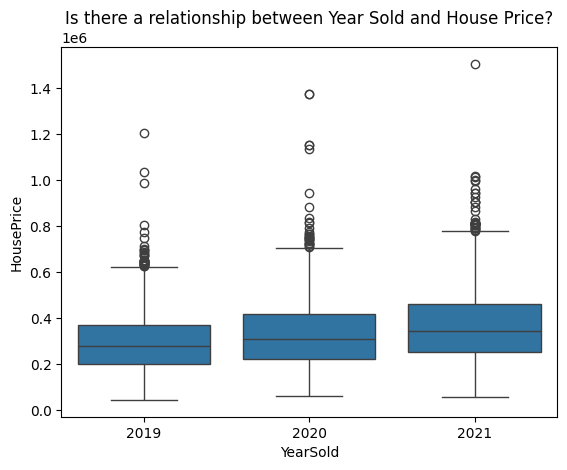

In [49]:
plt.title('Is there a relationship between Year Sold and House Price?')
sns.boxplot(x='YearSold', y='HousePrice', data=train)
plt.show()

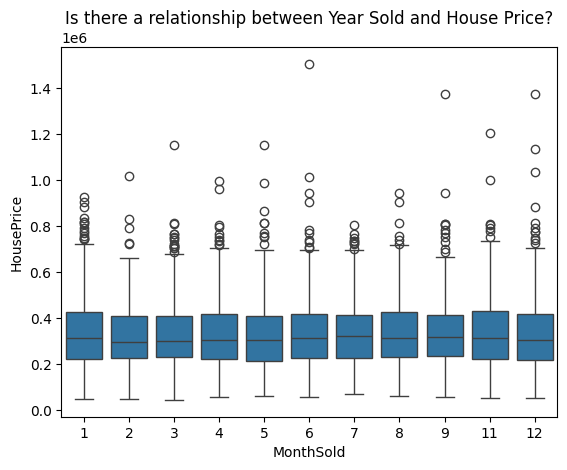

In [50]:
plt.title('Is there a relationship between Year Sold and House Price?')
sns.boxplot(x='MonthSold', y='HousePrice', data=train)
plt.show()

# 4. Data Preprocessing

## Build Preprocessing Function

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [52]:
# Using simple imputer
imputer = SimpleImputer()
imputer.fit(train[['HouseAge','DistanceToStation', 'NumberOfPubs']])
imputer.transform(train[train['HouseAge'].isnull()][['HouseAge','DistanceToStation', 'NumberOfPubs']])

array([[  17.37972167, 1091.84711209,    4.0735474 ],
       [  17.37972167, 1091.84711209,    4.        ]])

In [53]:
train[train['HouseAge'].isnull()][['HouseAge','DistanceToStation', 'NumberOfPubs']]
(16.0 - train['HouseAge'].mean()) / train['HouseAge'].std()

-0.12027904011738184

In [54]:
onehot = OneHotEncoder()
onehot.fit(train[['PostCode']])
onehot.transform(train[['PostCode']]).toarray()
onehot.get_feature_names_out()

array(['PostCode_5212.0', 'PostCode_5213.0', 'PostCode_5217.0',
       'PostCode_5222.0', 'PostCode_5614.0'], dtype=object)

In [55]:
class Preprocessor(BaseEstimator, TransformerMixin): 
    # Train our custom preprocessors 
    def fit(self, X, y=None): 
        
        # Create and fit simple imputer
        self.imputer = SimpleImputer()
        self.imputer.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        
        # Create and fit Standard Scaler 
        self.scaler = StandardScaler()
        self.scaler.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']]) 
        
        # Create and fit one hot encoder
        self.onehot = OneHotEncoder(handle_unknown='ignore')
        self.onehot.fit(X[['PostCode']])
        
        return self 
        
        
    # Apply our custom preprocessors 
    def transform(self, X): 
        
        # Apply simple imputer 
        imputed_cols = self.imputer.transform(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        onehot_cols = self.onehot.transform(X[['PostCode']])
        
        # Copy the df 
        transformed_df = X.copy()
        
        # Apply year and month transforms 
        transformed_df['Year'] = transformed_df['TransactionDate'].apply(lambda x: x[:4]).astype(int)
        transformed_df['Month'] = transformed_df['TransactionDate'].apply(lambda x: x[5:]).astype(int)
        transformed_df = transformed_df.drop('TransactionDate', axis=1)
        
        # Apply transformed columns
        transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']] = imputed_cols
        transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']] = self.scaler.transform(transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        
        # Drop existing Post Code column and replace with one hot equiv
        transformed_df = transformed_df.drop('PostCode', axis=1) 
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)
        
        return transformed_df

In [56]:
preproc = Preprocessor()

In [57]:
preproc.fit(train)

Preprocessor()

## Preview Preprocessed Data

In [58]:
preprocessed_df = preproc.transform(train.drop(['YearSold', 'MonthSold'], axis=1))
preprocessed_df.head()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice,Year,Month,PostCode_5212.0,PostCode_5213.0,PostCode_5217.0,PostCode_5222.0,PostCode_5614.0
ID,,,,,,,,,,,
8450,1.449005,-0.496716,1.328375,460286.0,2021,2,0,0,0,0,1
5758,-0.033105,-0.375573,-0.363196,253332.0,2020,1,0,1,0,0,0
4030,1.449005,-0.634586,1.666689,486532.0,2021,6,0,0,0,0,1
8447,-1.515216,-0.705984,0.651746,595168.0,2020,12,0,0,0,1,0
4370,1.449005,-0.761991,1.328375,250495.0,2019,3,1,0,0,0,0


In [59]:
preprocessed_df.dtypes

HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
HousePrice           float64
Year                   int64
Month                  int64
PostCode_5212.0        int64
PostCode_5213.0        int64
PostCode_5217.0        int64
PostCode_5222.0        int64
PostCode_5614.0        int64
dtype: object

In [60]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6541 entries, 8450 to 8915
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HouseAge           6541 non-null   float64
 1   DistanceToStation  6541 non-null   float64
 2   NumberOfPubs       6541 non-null   float64
 3   HousePrice         6541 non-null   float64
 4   Year               6541 non-null   int64  
 5   Month              6541 non-null   int64  
 6   PostCode_5212.0    6541 non-null   int64  
 7   PostCode_5213.0    6541 non-null   int64  
 8   PostCode_5217.0    6541 non-null   int64  
 9   PostCode_5222.0    6541 non-null   int64  
 10  PostCode_5614.0    6541 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 613.2 KB


## Clean up Analysis Features

In [61]:
train = train.drop(['YearSold','MonthSold'], axis=1)

In [62]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0


## Create X and y values

In [63]:
X_train = train.drop('HousePrice', axis=1) 
y_train = train['HousePrice'] 

# 5. Modelling

## Import ML Dependencies

In [65]:
pip install xgboost

  Using cached xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (2.2 MB)
You should consider upgrading via the '/Users/yeshwanthvemula/Desktop/Full Stack Machine Learning/fullstack/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

## Create Pipelines

In [67]:
pipelines = {
    'ridge': make_pipeline(Preprocessor(), Ridge()), 
    'rf': make_pipeline(Preprocessor(), RandomForestRegressor()), 
    'gb': make_pipeline(Preprocessor(), GradientBoostingRegressor()), 
    'xg': make_pipeline(Preprocessor(), XGBRegressor()), 
}

In [68]:
pipelines['xg']

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

### Training Outside of a Pipeline

In [69]:
X_temp = preprocessed_df.drop('HousePrice', axis=1)
y_temp = preprocessed_df['HousePrice']

In [70]:
ridgemodel = Ridge()

In [71]:
ridgemodel.fit(X_temp, y_temp)

Ridge()

In [72]:
ridgemodel.predict(X_temp)

array([453158.70403589, 281048.56313424, 473919.13468581, ...,
       305550.33100002, 349468.7929066 , 301856.67576404])

## Create Tuning Grids

In [73]:
pipelines['rf'].get_params()

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'randomforestregressor': RandomForestRegressor(),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__monotonic_cst': None,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': None,
 'randomforestregressor__verbose

In [74]:
grid = {
    'ridge':{'ridge__alpha':[0.05, 0.25, 0.5, 1.0]}, 
    'rf':{
        'randomforestregressor__n_estimators':[100,200,300], 
        'randomforestregressor__max_depth':[5,6,7,None]
    },
    'gb':{
        'gradientboostingregressor__n_estimators':[100,200,300], 
        'gradientboostingregressor__max_depth':[5,6,7, None]
    },
    'xg':{
       'xgbregressor__n_estimators':[100,200,300], 
       'xgbregressor__max_depth':[5,6,7,None]
    }
}

## Train Models and Perform HPO

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
fit_models = {}
for algo, pipeline in pipelines.items(): 
    try: 
        print(algo)
        model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10, scoring='r2')
        model.fit(X_train, y_train) 
        fit_models[algo] = model 
    except Exception as e: 
        print(f'Model {algo} had an error {e}')

ridge
rf
gb
xg


In [77]:
fit_models

{'ridge': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                        ('ridge', Ridge())]),
              n_jobs=-1, param_grid={'ridge__alpha': [0.05, 0.25, 0.5, 1.0]},
              scoring='r2'),
 'rf': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                        ('randomforestregressor',
                                         RandomForestRegressor())]),
              n_jobs=-1,
              param_grid={'randomforestregressor__max_depth': [5, 6, 7, None],
                          'randomforestregressor__n_estimators': [100, 200,
                                                                  300]},
              scoring='r2'),
 'gb': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                        ('gradientboostingregressor',
                                      

# 6. Evaluate Models

## Import Evaluation Metrics

In [78]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Preprocess Test Set For Predictions

### Look for Nulls

In [79]:
# Look for nulls in dataset
test.isnull().sum()

TransactionDate      1
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           2
dtype: int64

In [80]:
# Drop any nulls in the house price 
test = test[~test.HousePrice.isnull()]

In [81]:
# Double check nulls are removed
test.isnull().sum()

TransactionDate      0
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           0
dtype: int64

### Check datatypes

In [82]:
test.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [83]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

In [84]:
# Fix datatypes in test dataframe
test = test[test['HousePrice']!='??']
test['HousePrice'] = test.HousePrice.astype(float)
test['TransactionDate'] = test.TransactionDate.astype(str)
test['PostCode'] = test.PostCode.astype(str)

In [85]:
test.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

### Create X_test and y_test 

In [86]:
X_test = test.drop('HousePrice', axis=1)
y_test = test['HousePrice']

In [87]:
X_test.shape

(2803, 5)

In [88]:
y_test.shape

(2803,)

## Calculate Regression Metrics

In [89]:
for algo, model in fit_models.items(): 
    yhat = model.predict(X_test)
    r2 = r2_score(y_test, yhat) 
    mae = mean_absolute_error(y_test, yhat)
    print(f'{algo}- R2 Score:{r2}, MAE Score:{mae}') 

ridge- R2 Score:0.6691443155811712, MAE Score:62578.08779739852
rf- R2 Score:0.8197332931670795, MAE Score:44507.91621298609
gb- R2 Score:0.86352383953613, MAE Score:38638.66812729437
xg- R2 Score:0.856389713877994, MAE Score:39308.03106325812


## Make Predictions

In [90]:
model = fit_models['gb']

In [91]:
yhat = model.predict(X_test)

In [92]:
results_df = y_test.to_frame()
results_df['yhat'] = yhat 
results_df['delta'] = results_df.HousePrice.astype(float) - results_df.yhat

In [93]:
results_df.to_csv('results.csv')

## Explain model

### Calculate Feature Importance

In [94]:
ensemble = model.best_estimator_['gradientboostingregressor']

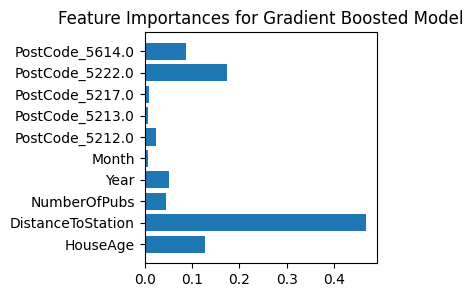

In [95]:
plt.figure(figsize=(3,3))
plt.title('Feature Importances for Gradient Boosted Model')
plt.barh(ensemble.feature_names_in_, ensemble.feature_importances_)
plt.show()

### Calculate Feature Importance for All Models

In [96]:
import numpy as np 

In [97]:
new_metric = np.square(fit_models['ridge'].best_estimator_[1].coef_) / np.sum(np.square(fit_models['ridge'].best_estimator_[1].coef_) )

In [98]:
np.sum(new_metric)

1.0

In [99]:
feature_importances = {}
for algo, pipeline in fit_models.items(): 
    if algo == 'ridge': 
        coef_ = pipeline.best_estimator_[1].coef_
        feature_importances[algo] = np.square(coef_) / np.sum(np.square(coef_))
    else: 
        feature_importances[algo] = pipeline.best_estimator_[1].feature_importances_

In [100]:
feature_importances

{'ridge': array([1.64842453e-02, 1.01874497e-01, 3.10969377e-02, 3.86862977e-02,
        5.94596526e-06, 2.25704876e-01, 9.47271060e-02, 1.69412578e-02,
        3.92285970e-01, 8.21928660e-02]),
 'rf': array([0.13668967, 0.44506656, 0.05595723, 0.05072343, 0.03516617,
        0.0090523 , 0.00263526, 0.01153129, 0.16643013, 0.08674796]),
 'gb': array([0.12745505, 0.46764999, 0.04508627, 0.05179144, 0.00627297,
        0.02394772, 0.00650837, 0.00966339, 0.17485277, 0.08677203]),
 'xg': array([0.03630189, 0.09950483, 0.02019886, 0.06381075, 0.00548409,
        0.07154408, 0.01112794, 0.07640759, 0.3810329 , 0.23458697],
       dtype=float32)}

In [101]:
importance_df = pd.DataFrame(feature_importances, index=ensemble.feature_names_in_)
importance_df

,ridge,rf,gb,xg
HouseAge,0.016484,0.136690,0.127455,0.036302
DistanceToStation,0.101874,0.445067,0.467650,0.099505
NumberOfPubs,0.031097,0.055957,0.045086,0.020199
Year,0.038686,0.050723,0.051791,0.063811
Month,0.000006,0.035166,0.006273,0.005484
PostCode_5212.0,0.225705,0.009052,0.023948,0.071544
PostCode_5213.0,0.094727,0.002635,0.006508,0.011128
PostCode_5217.0,0.016941,0.011531,0.009663,0.076408
PostCode_5222.0,0.392286,0.166430,0.174853,0.381033
PostCode_5614.0,0.082193,0.086748,0.086772,0.234587


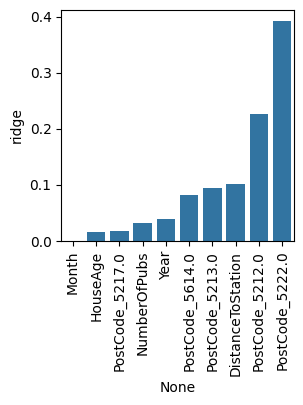

In [102]:
plt.figure(figsize=(3,3))
model_name = 'ridge'
sorted_imp = importance_df.sort_values(model_name)
sns.barplot(x = sorted_imp.index, y = model_name, data=sorted_imp)
plt.xticks(rotation=90)
plt.show()

### Plot Trees

In [103]:
!pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/de/5e/fcbb22c68208d39edff467809d06c9d81d7d27426460ebc598e55130c1aa/graphviz-0.20.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 520.6 kB/s eta 0:00:000:00:01


In [104]:
from sklearn.tree import plot_tree
import xgboost as xgb
from matplotlib.pylab import rcParams

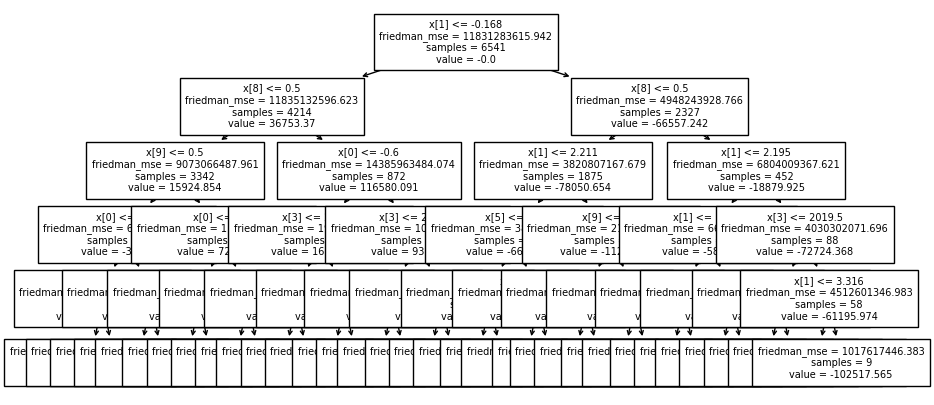

In [105]:
# Plot tree for gradient boosted model
plt.figure(figsize=(10,5))
plot_tree(ensemble.estimators_[5,0], fontsize=7)
plt.show()

In [106]:
ensemble.feature_names_in_[2]

'NumberOfPubs'

In [107]:
X_train.shape

(6541, 5)

In [109]:
pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
You should consider upgrading via the '/Users/yeshwanthvemula/Desktop/Full Stack Machine Learning/fullstack/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


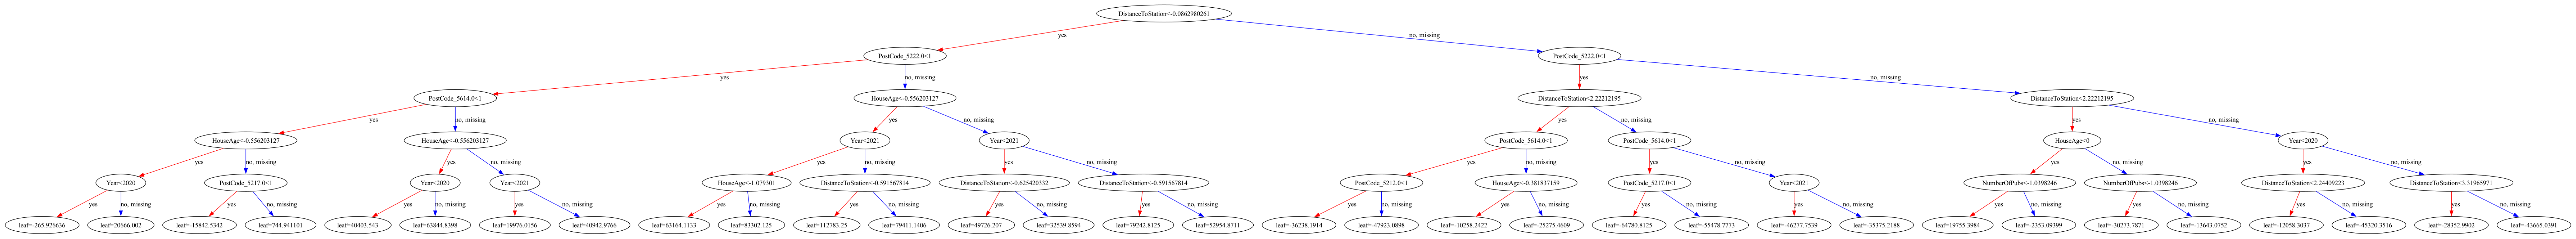

In [110]:
rcParams['figure.figsize'] = 100,100
xgb.plot_tree(fit_models['xg'].best_estimator_[1])
plt.show()

# 7. Save model

In [112]:
pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 KB 1.2 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/Users/yeshwanthvemula/Desktop/Full Stack Machine Learning/fullstack/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [113]:
import dill

In [114]:
model = fit_models['gb']

In [115]:
# Save model using dill 
with open('gb.pkl', 'wb') as f: 
    dill.dump(model, f)

In [116]:
with open('gb.pkl', 'rb') as f: 
    reloaded_model = dill.load(f)

In [117]:
reloaded_model.predict(X_test)

array([660072.29726806, 289177.79297644, 166619.49465334, ...,
       392935.05936691, 737461.9967578 , 400940.79244598])

In [118]:
X_test.loc[0].to_json()

'{"TransactionDate":"2020.12","HouseAge":17.0,"DistanceToStation":467.6447748,"NumberOfPubs":4.0,"PostCode":"5222.0"}'